Stock Market S&P 500 - The S&P 500 is a stock market index that measures the stock performance of 506 large companies listed on stock exchanges in the United States

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import requests
import io
import seaborn as sns
import numpy as np
from datetime import datetime, date

import plotly
import plotly.express as px
import plotly.graph_objs as go
import chart_studio.plotly as py

import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode, plot
cf.go_offline()

import quandl

In [2]:
dataset = pd.read_csv('C:/Users/Amit Baghel/Desktop/S&P 500/cs-1.csv')

In [3]:
dataset.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [5]:
median_open = dataset['open'].median() 
dataset['open'].fillna(median_open, inplace = True)
median_low = dataset['open'].median() 
dataset['low'].fillna(median_low, inplace = True)
median_high = dataset['open'].median() 
dataset['high'].fillna(median_high, inplace = True)

In [6]:
dataset.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [7]:
corr_matrix = dataset.corr()
corr_matrix['open'].sort_values(ascending = False)

open      1.000000
high      0.999939
low       0.999927
close     0.999853
volume   -0.142703
Name: open, dtype: float64

<AxesSubplot:>

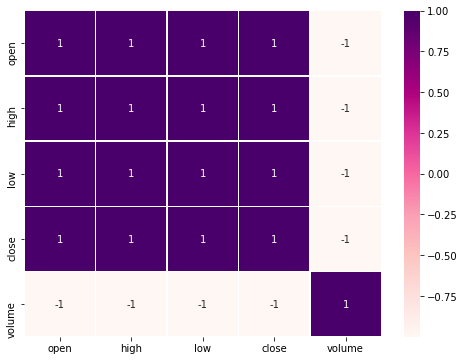

In [8]:
plt.figure(figsize=(8,6))
corr=corr_matrix.corr(method='pearson')
sns.heatmap(corr, annot=True,linewidths=.5,cmap = 'RdPu')

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619040 non-null  float64
 2   high    619040 non-null  float64
 3   low     619040 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [10]:
dataset.loc[:, 'date'] = pd.to_datetime(dataset.loc[:,'date'], format="%Y/%m/%d")

In [11]:
#Extracting Year.
dataset['Year'] =dataset['date'].dt.year

#Extracting Month.
dataset['Month'] =dataset['date'].dt.month_name(locale='English')

#Extracting Weekdays
dataset['Week_Days'] = dataset['date'].dt.day_name(locale = 'English')


In [12]:
# Replace the column name from name to ticks
dataset = dataset.rename(columns={'Name': 'Ticks'})

In [13]:
# Let's analyze some of the stocks.
amzn = dataset.loc[dataset['Ticks'] == 'AMZN']
amzn.head()

,date,open,high,low,close,volume,Ticks,Year,Month,Week_Days
46387,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN,2013,February,Friday
46388,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN,2013,February,Monday
46389,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN,2013,February,Tuesday
46390,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN,2013,February,Wednesday
46391,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN,2013,February,Thursday


In [14]:
amzn['Week_Days'].value_counts().iplot(kind ='barh',title ='Weekly', color ='purple')

In [15]:
amzn['Month'].value_counts().iplot(kind ='bar',title ='Monthly', color ='blue')

In [16]:
amzn['Year'].value_counts().iplot(kind ='bar',title ='Yearly',color ='#DC5039')

In [17]:
# First calculate the mid prices from the highest and lowest
#Green = dataset.loc[:,'high'].to_numpy()
#Red = dataset.loc[:,'low'].to_numpy()
#Yellow = (Red+Green)/2.0

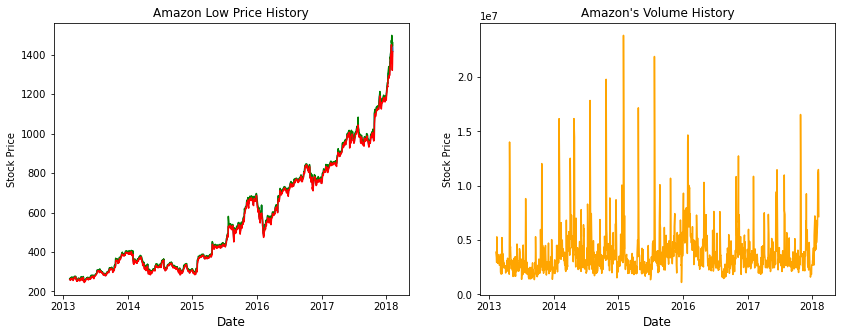

In [18]:
# Simple plotting of Amazon Stock Price
# First Subplot
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
ax1.plot(amzn["date"], amzn["close"])
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Amazon Close Price History")

# Second Subplot
ax1.plot(amzn["date"], amzn["high"], color="green")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Amazon High Price History")

# Third Subplot
ax1.plot(amzn["date"], amzn["low"], color="red")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Amazon Low Price History")

# Fourth Subplot
ax2.plot(amzn["date"], amzn["volume"], color="orange")
ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("Stock Price")
ax2.set_title("Amazon's Volume History")
plt.show()

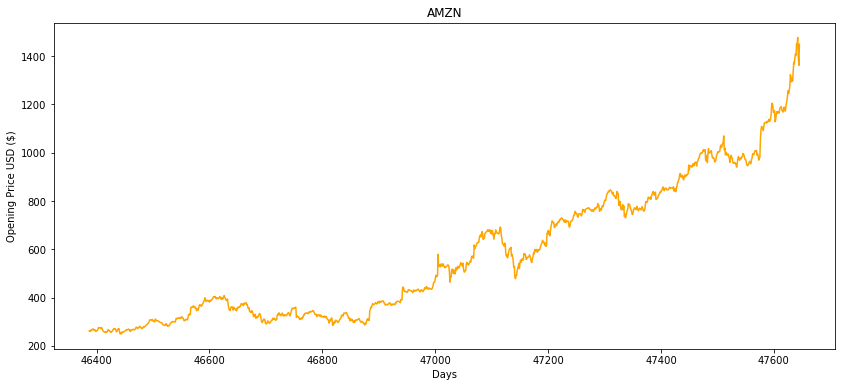

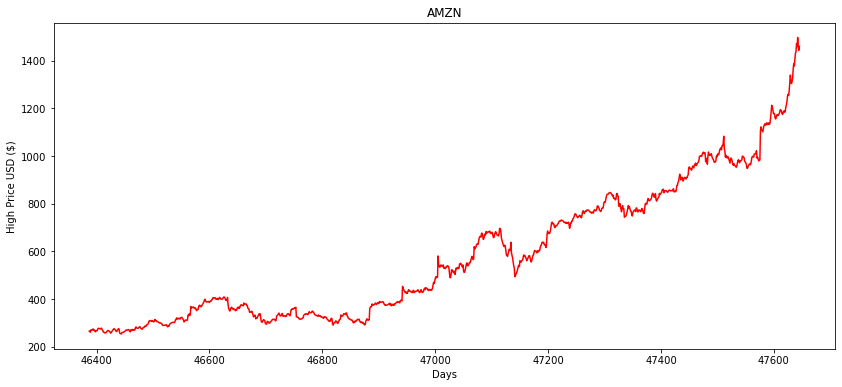

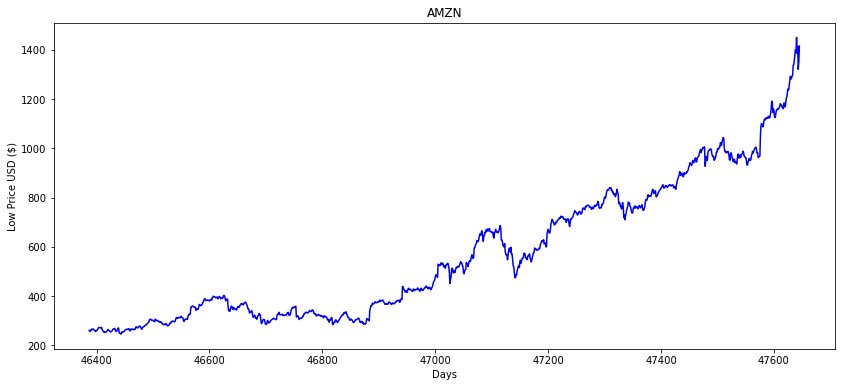

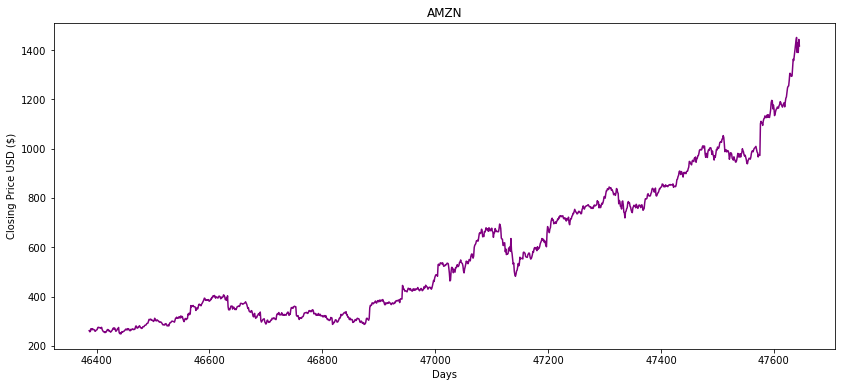

In [19]:
# Visualizing the Opening prices of the data.
color='#539ecd'
plt.figure(figsize=(14,6))
plt.title('AMZN')
plt.xlabel('Days')
plt.ylabel('Opening Price USD ($)')
plt.plot(amzn['open'],color="orange")
plt.show()

# Visualizing the high prices of the data.
plt.figure(figsize=(14,6))
plt.title('AMZN')
plt.xlabel('Days')
plt.ylabel('High Price USD ($)')
plt.plot(amzn['high'],color="red")
plt.show()

# Visualizing the low prices of the data.
plt.figure(figsize=(14,6))
plt.title('AMZN')
plt.xlabel('Days')
plt.ylabel('Low Price USD ($)')
plt.plot(amzn['low'],color="blue")
plt.show()

# Visualizing the Closing prices of the data.
plt.figure(figsize=(14,6))
plt.title('AMZN')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(amzn['close'],color="purple")
plt.show()

In [20]:
trace = go.Ohlc(x=amzn['date'],
                open=amzn['open'],
                high=amzn['high'],
                low=amzn['low'],
                close=amzn['close'],
               increasing=dict(line=dict(color= '#58FA58')),
                decreasing=dict(line=dict(color= '#FA5858')))

layout = {
    'title': 'Amazon Historical Price',
    'xaxis': {'title': 'Date',
             'rangeslider': {'visible': False}},
    'yaxis': {'title': 'Stock Price (USD$)'},
    'shapes': [{
        'x0': '2016-12-09', 'x1': '2016-12-09',
        'y0': 0, 'y1': 1, 'xref': 'x', 'yref': 'paper',
        'line': {'color': 'rgb(30,30,30)', 'width': 1}
    }],
    'annotations': [{
        'x': '2017-01-20', 'y': 0.05, 'xref': 'x', 'yref': 'paper',
        'showarrow': False, 'xanchor': 'left',
          'text': ''
    }]
}

data = [trace]

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='simple_ohlc')

In [21]:
amzn['month_year'] = pd.to_datetime(amzn['date']).dt.to_period('M')

# 2017 onwards
last_year = amzn.loc[amzn['date'].dt.year > 2017]
g = last_year.groupby(["date"])
monthly_averages = g.aggregate({"open": np.mean, "high": np.mean, "low": np.mean, "close":np.mean})
monthly_averages.reset_index(level=0, inplace=True)

monthly_averages.dtypes

trace = go.Candlestick(x=monthly_averages['date'],
                       open=monthly_averages['open'].values.tolist(),
                       high=monthly_averages['high'].values.tolist(),
                       low=monthly_averages['low'].values.tolist(),
                       close=monthly_averages['close'].values.tolist(),
                      increasing=dict(line=dict(color= '#58FA58')),
                decreasing=dict(line=dict(color= '#FA5858')))
layout = {
    'title': 'Amazon Historical Price <br> <i>A closer look to the upward trend </i>',
    'xaxis': {'title': 'Date',
             'rangeslider': {'visible': False}},
    'yaxis': {'title': 'Stock Price (USD$)'}
}

data = [trace]

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='simple_ohlc')


In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   date       619040 non-null  datetime64[ns]
 1   open       619040 non-null  float64       
 2   high       619040 non-null  float64       
 3   low        619040 non-null  float64       
 4   close      619040 non-null  float64       
 5   volume     619040 non-null  int64         
 6   Ticks      619040 non-null  object        
 7   Year       619040 non-null  int64         
 8   Month      619040 non-null  object        
 9   Week_Days  619040 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 47.2+ MB


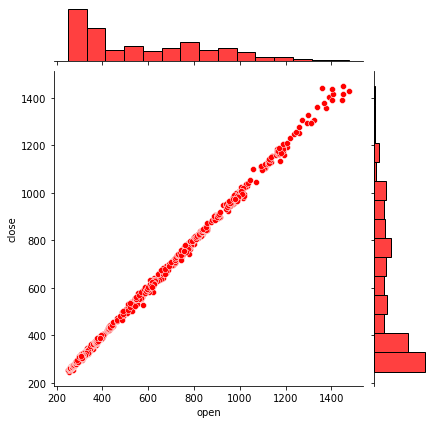

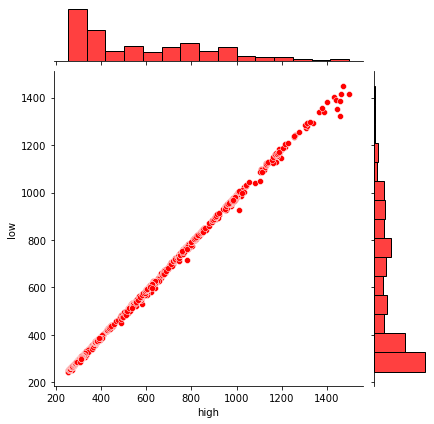

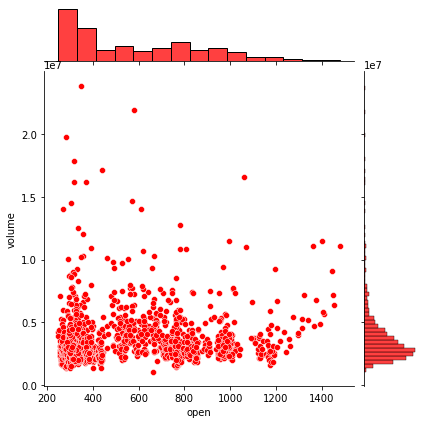

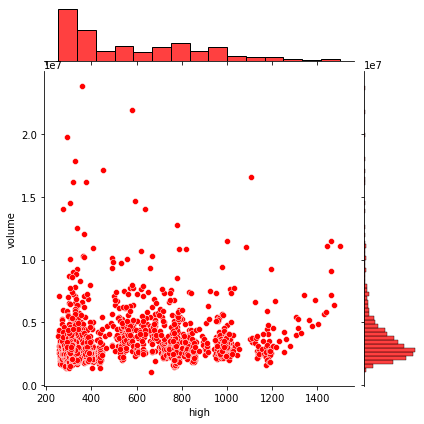

In [23]:
sns.jointplot(x='open',y ='close', data =amzn, color ='red')
sns.jointplot(x='high',y ='low', data =amzn, color ='red'),
sns.jointplot(x='open',y ='volume', data =amzn, color ='red')
sns.jointplot(x='high',y ='volume', data =amzn, color ='red')

In [24]:
# Prediction 100 days into the future.
future_days = 100
amzn['RSI'] = amzn['close'].shift(-future_days)
amzn['DIFF1'] = amzn['close'].diff().values
amzn['DIFF2'] = amzn['close'].diff(2).values
amzn['DIFF3'] = amzn['close'].diff(3).values
amzn['DIFF4'] = amzn['close'].diff(4).values

In [25]:
amzn.tail()

,date,open,high,low,close,volume,Ticks,Year,Month,Week_Days,month_year,RSI,DIFF1,DIFF2,DIFF3,DIFF4
47641,2018-02-01,1445.00,1459.88,1385.14,1390.00,9113808,AMZN,2018,February,Thursday,2018-02,NaN,-60.89,-47.82,-27.68,-12.05
47642,2018-02-02,1477.39,1498.00,1414.00,1429.95,11125722,AMZN,2018,February,Friday,2018-02,NaN,39.95,-20.94,-7.87,12.27
47643,2018-02-05,1402.62,1458.98,1320.72,1390.00,11494985,AMZN,2018,February,Monday,2018-02,NaN,-39.95,0.00,-60.89,-47.82
47644,2018-02-06,1361.46,1443.99,1351.79,1442.84,11066819,AMZN,2018,February,Tuesday,2018-02,NaN,52.84,12.89,52.84,-8.05
47645,2018-02-07,1449.00,1460.99,1415.15,1416.78,7162741,AMZN,2018,February,Wednesday,2018-02,NaN,-26.06,26.78,-13.17,26.78


In [26]:
amzn['Trend'] = np.where(amzn.close.shift(-1) > amzn.close, 1, 0)
amzn.head()

,date,open,high,low,close,volume,Ticks,Year,Month,Week_Days,month_year,RSI,DIFF1,DIFF2,DIFF3,DIFF4,Trend
46387,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN,2013,February,Friday,2013-02,284.03,NaN,NaN,NaN,NaN,0
46388,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN,2013,February,Monday,2013-02,285.88,-4.74,NaN,NaN,NaN,1
46389,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN,2013,February,Tuesday,2013-02,290.59,1.49,-3.25,NaN,NaN,1
46390,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN,2013,February,Wednesday,2013-02,291.53,10.77,12.26,7.52,NaN,0
46391,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN,2013,February,Thursday,2013-02,292.33,-0.23,10.54,12.03,7.29,0


In [27]:
amzn.dropna(inplace=True)
predictors_list = ['RSI','DIFF1','DIFF2','DIFF3','DIFF4']
x = amzn[predictors_list]
y = amzn.Trend

In [28]:
y.tail()

47541    1
47542    1
47543    1
47544    0
47545    0
Name: Trend, dtype: int32

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(x,y,test_size=0.3, random_state=42, stratify =y)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(808, 5) (808,)
(347, 5) (347,)


In [30]:
from sklearn.tree import DecisionTreeClassifier
dtr = DecisionTreeClassifier(criterion ='gini', max_depth=3, min_samples_leaf=5)
dtr

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [31]:
dtr = dtr.fit(x_train, y_train)

In [32]:
y_pred =dtr.predict(x_test)

In [33]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.40      0.22      0.28       160
           1       0.52      0.72      0.60       187

    accuracy                           0.49       347
   macro avg       0.46      0.47      0.44       347
weighted avg       0.46      0.49      0.45       347



In [34]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.48703170028818443


In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

In [36]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5360230547550432


In [37]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model = gnb.fit(x_train, y_train)

In [38]:
preds = gnb.predict(x_test)
print(preds)

[1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1
 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1
 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [39]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, preds))

Accuracy: 0.5072046109510087


Hence , RandomForestClassifier performing better